# Feature Engineering Project
- imports

In [1]:
# !pip install tqdm

In [2]:
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

C:\Users\Sadie\AppData\Local\Temp\ipykernel_9080\963074307.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


- Data Reading

In [3]:
def read_and_combine(folder: str = "training"):
    
    # Path to the folder containing CSV files
    folder_path = "../data/" + folder
    # List to store DataFrames from each CSV file
    dataFrames = []
    # Loop through all files in the folder
    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            # Read each CSV file into a DataFrame and append to the list
            dataframe = pd.read_csv(file_path)
            dataFrames.append(dataframe)
    # Combine all DataFrames into one
    combined_dataframe = pd.concat(dataFrames, ignore_index=True)
    # Save the combined DataFrame to a new CSV file
    combined_dataframe.to_csv('combined_output.csv', index=False)
    # Display the combined DataFrame
    return combined_dataframe

In [4]:
training_data = read_and_combine()
training_data.shape

  0%|          | 0/185 [00:00<?, ?it/s]

100%|██████████| 185/185 [00:02<00:00, 82.80it/s]
C:\Users\Sadie\AppData\Local\Temp\ipykernel_9080\2868441017.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_dataframe = pd.concat(dataFrames, ignore_index=True)


(672744, 25)

In [5]:
validation_data = read_and_combine("validation")
validation_data.shape

100%|██████████| 185/185 [00:00<00:00, 261.64it/s]
C:\Users\Sadie\AppData\Local\Temp\ipykernel_9080\2868441017.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_dataframe = pd.concat(dataFrames, ignore_index=True)


(144148, 25)

In [6]:
test_data = read_and_combine("test")
test_data.shape

100%|██████████| 185/185 [00:00<00:00, 231.56it/s]
C:\Users\Sadie\AppData\Local\Temp\ipykernel_9080\2868441017.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_dataframe = pd.concat(dataFrames, ignore_index=True)


(156262, 25)

In [7]:
training_data.dtypes

MACHINE_ID                       object
MACHINE_DATA                     object
TIMESTAMP                       float64
WAFER_ID                         object
STAGE                            object
CHAMBER                         float64
USAGE_OF_BACKING_FILM           float64
USAGE_OF_DRESSER                float64
USAGE_OF_POLISHING_TABLE        float64
USAGE_OF_DRESSER_TABLE          float64
PRESSURIZED_CHAMBER_PRESSURE    float64
MAIN_OUTER_AIR_BAG_PRESSURE     float64
CENTER_AIR_BAG_PRESSURE         float64
RETAINER_RING_PRESSURE          float64
RIPPLE_AIR_BAG_PRESSURE         float64
USAGE_OF_MEMBRANE               float64
USAGE_OF_PRESSURIZED_SHEET      float64
SLURRY_FLOW_LINE_A              float64
SLURRY_FLOW_LINE_B              float64
SLURRY_FLOW_LINE_C              float64
WAFER_ROTATION                  float64
STAGE_ROTATION                  float64
HEAD_ROTATION                   float64
DRESSING_WATER_STATUS           float64
EDGE_AIR_BAG_PRESSURE           float64


In [8]:
training_data.describe()

,TIMESTAMP,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,PRESSURIZED_CHAMBER_PRESSURE,MAIN_OUTER_AIR_BAG_PRESSURE,CENTER_AIR_BAG_PRESSURE,RETAINER_RING_PRESSURE,...,USAGE_OF_MEMBRANE,USAGE_OF_PRESSURIZED_SHEET,SLURRY_FLOW_LINE_A,SLURRY_FLOW_LINE_B,SLURRY_FLOW_LINE_C,WAFER_ROTATION,STAGE_ROTATION,HEAD_ROTATION,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE
count,6.727440e+05,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,...,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000
mean,4.844186e+08,4.223673,4968.532485,396.444964,171.983843,3496.348712,49.973427,155.327976,40.147023,1218.777316,...,58.915409,1490.559854,4.245952,0.725417,249.354458,12.802433,52.437560,159.792734,0.424763,28.531700
std,1.639134e+06,1.333534,2888.628864,219.524524,94.623563,479.742809,39.241073,133.191797,34.240954,1499.216737,...,34.252516,866.588654,6.683546,0.420575,214.034647,16.325427,91.878220,8.889108,0.494307,24.346485
min,4.816344e+08,1.000000,19.166667,5.185185,0.000000,2664.750000,0.000000,0.000000,0.000000,0.000000,...,0.227273,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.827736e+08,4.000000,2425.000000,205.185185,88.888889,3041.000000,0.000000,0.000000,0.000000,0.000000,...,28.754941,727.500000,2.222222,0.909091,0.000000,0.000000,0.000000,156.800000,0.000000,0.000000
50%,4.846534e+08,4.000000,5036.666667,395.925926,172.592593,3544.750000,72.857143,252.000000,61.250000,1446.900000,...,59.723320,1511.000000,2.222222,0.909091,411.600000,0.000000,0.000000,160.000000,0.000000,43.939394
75%,4.857991e+08,5.000000,7322.500000,590.370370,254.074074,3912.000000,77.142857,268.800000,66.250000,1454.700000,...,86.828063,2196.750000,2.222222,0.909091,439.600000,34.651163,65.526316,160.000000,1.000000,48.484848
max,4.872682e+08,6.000000,10532.500000,771.851852,357.037037,4305.500000,189.047619,499.200000,139.375000,10662.600000,...,124.891304,3159.750000,42.638889,12.500000,1083.600000,34.883721,263.552632,192.000000,1.000000,141.515152


- Feature Extraction

In [9]:
def extract_features(data: pd.DataFrame,
                    id_column: str = "WAFER_ID",
                    non_extracted_columns: list = ["TIMESTAMP", "WAFER_ID", "CHAMBER"]):
    
    unique_ids = data[id_column].unique()
    
    data_rows = []
    for wafer in tqdm(unique_ids):
        wafer_data = data[data["WAFER_ID"]==wafer]
        # Iterate through each numerical column and calculate the features using numpy
        features_np = {}
        for column in wafer_data.select_dtypes(include='number').columns:
            if column in non_extracted_columns:
                continue
            col_data = wafer_data[column].values  # Convert the column to a numpy array
            features_np.update({
                f'{column}_Mean': np.mean(col_data),
                f'{column}_Median': np.median(col_data),
                f'{column}_StdDev': np.std(col_data, ddof=1),  # ddof=1 for sample standard deviation
                f'{column}_Variance': np.var(col_data, ddof=1),  # ddof=1 for sample variance
                f'{column}_Minimum': np.min(col_data),
                f'{column}_Maximum': np.max(col_data),
                f'{column}_Range': np.ptp(col_data),  # Peak-to-peak is a simpler way to compute range
                f'{column}_Skewness': pd.Series(col_data).skew(),  # Using pandas for skew as numpy does not have a direct function
                f'{column}_Kurtosis': pd.Series(col_data).kurt(),  # Using pandas for kurtosis as numpy does not have a direct function
                f'{column}_25thPercentile': np.percentile(col_data, 25),
                f'{column}_50thPercentile': np.percentile(col_data, 50),
                f'{column}_75thPercentile': np.percentile(col_data, 75)
            })
        # Convert the features dictionary to a DataFrame
        # Since we want all features in one row, we use pd.DataFrame and specify the index [0]
        feature_df = pd.DataFrame([features_np])
        feature_df.insert(0, "WAFER_ID", wafer)
        feature_df.insert(1, "STAGE", np.unique(wafer_data["STAGE"])[0])
        feature_df.insert(2, "CHAMBER", np.unique(wafer_data["CHAMBER"])[0])

        data_rows.append(feature_df)
    extracted_data = pd.concat(data_rows)
    return extracted_data

In [10]:
training_set = extract_features(training_data)
training_set.dtypes

  0%|          | 0/1699 [00:00<?, ?it/s]

100%|██████████| 1699/1699 [01:30<00:00, 18.69it/s]


WAFER_ID                                  int64
STAGE                                    object
CHAMBER                                 float64
USAGE_OF_BACKING_FILM_Mean              float64
USAGE_OF_BACKING_FILM_Median            float64
                                         ...   
EDGE_AIR_BAG_PRESSURE_Skewness          float64
EDGE_AIR_BAG_PRESSURE_Kurtosis          float64
EDGE_AIR_BAG_PRESSURE_25thPercentile    float64
EDGE_AIR_BAG_PRESSURE_50thPercentile    float64
EDGE_AIR_BAG_PRESSURE_75thPercentile    float64
Length: 231, dtype: object

In [11]:
validation_set = extract_features(validation_data)
validation_set.dtypes

100%|██████████| 416/416 [00:09<00:00, 45.64it/s]


WAFER_ID                                  int64
STAGE                                    object
CHAMBER                                 float64
USAGE_OF_BACKING_FILM_Mean              float64
USAGE_OF_BACKING_FILM_Median            float64
                                         ...   
EDGE_AIR_BAG_PRESSURE_Skewness          float64
EDGE_AIR_BAG_PRESSURE_Kurtosis          float64
EDGE_AIR_BAG_PRESSURE_25thPercentile    float64
EDGE_AIR_BAG_PRESSURE_50thPercentile    float64
EDGE_AIR_BAG_PRESSURE_75thPercentile    float64
Length: 231, dtype: object

In [12]:
test_set = extract_features(test_data)
test_data.dtypes

100%|██████████| 415/415 [00:09<00:00, 42.18it/s]


MACHINE_ID                       object
MACHINE_DATA                     object
TIMESTAMP                       float64
WAFER_ID                         object
STAGE                            object
CHAMBER                         float64
USAGE_OF_BACKING_FILM           float64
USAGE_OF_DRESSER                float64
USAGE_OF_POLISHING_TABLE        float64
USAGE_OF_DRESSER_TABLE          float64
PRESSURIZED_CHAMBER_PRESSURE    float64
MAIN_OUTER_AIR_BAG_PRESSURE     float64
CENTER_AIR_BAG_PRESSURE         float64
RETAINER_RING_PRESSURE          float64
RIPPLE_AIR_BAG_PRESSURE         float64
USAGE_OF_MEMBRANE               float64
USAGE_OF_PRESSURIZED_SHEET      float64
SLURRY_FLOW_LINE_A              float64
SLURRY_FLOW_LINE_B              float64
SLURRY_FLOW_LINE_C              float64
WAFER_ROTATION                  float64
STAGE_ROTATION                  float64
HEAD_ROTATION                   float64
DRESSING_WATER_STATUS           float64
EDGE_AIR_BAG_PRESSURE           float64


In [13]:
del training_data, validation_data, test_data

- Add the output column to the sets

In [14]:
def add_output_column(data: pd.DataFrame(),
                      data_name: str = "training"):
    output_data = pd.read_csv("../data/CMP-" + data_name + "-removalrate.csv")
    data = pd.merge(data, output_data, on=['WAFER_ID', 'STAGE'])
    return data   

In [15]:
training_set = add_output_column(training_set)

In [16]:
training_set['STAGE'] = training_set['STAGE'].replace({'A': 0, 'B': 1})
training_set.head()

C:\Users\Sadie\AppData\Local\Temp\ipykernel_9080\1518546090.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training_set['STAGE'] = training_set['STAGE'].replace({'A': 0, 'B': 1})


,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM_Mean,USAGE_OF_BACKING_FILM_Median,USAGE_OF_BACKING_FILM_StdDev,USAGE_OF_BACKING_FILM_Variance,USAGE_OF_BACKING_FILM_Minimum,USAGE_OF_BACKING_FILM_Maximum,USAGE_OF_BACKING_FILM_Range,...,EDGE_AIR_BAG_PRESSURE_Variance,EDGE_AIR_BAG_PRESSURE_Minimum,EDGE_AIR_BAG_PRESSURE_Maximum,EDGE_AIR_BAG_PRESSURE_Range,EDGE_AIR_BAG_PRESSURE_Skewness,EDGE_AIR_BAG_PRESSURE_Kurtosis,EDGE_AIR_BAG_PRESSURE_25thPercentile,EDGE_AIR_BAG_PRESSURE_50thPercentile,EDGE_AIR_BAG_PRESSURE_75thPercentile,AVG_REMOVAL_RATE
0,371447024,0,1.0,9307.651515,9307.500000,3.083687e+00,9.509126e+00,9302.500000,9313.333333,10.833333,...,381.541027,0.0,60.909091,60.909091,-2.039952,2.612346,48.787879,60.606061,60.909091,149.13090
1,371447028,0,1.0,9356.666667,9356.666667,1.822178e-12,3.320332e-24,9356.666667,9356.666667,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.04915
2,371447036,0,1.0,9356.666667,9356.666667,1.822294e-12,3.320754e-24,9356.666667,9356.666667,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151.70175
3,-4113511818,0,4.0,9624.115882,9972.500000,3.598210e+02,1.294712e+05,9253.333333,9985.833333,732.500000,...,334.830661,0.0,57.878788,57.878788,-1.512967,0.648421,43.939394,44.242424,48.484848,65.02230
4,-4113511780,0,4.0,9266.260623,9266.666667,3.802814e+00,1.446140e+01,9260.000000,9272.500000,12.500000,...,778.262958,0.0,106.363636,106.363636,-0.517512,-0.588680,33.030303,48.787879,69.696970,61.04565


In [17]:
test_set = add_output_column(test_set,
                             data_name="test")

In [18]:
test_set['STAGE'] = test_set['STAGE'].replace({'A': 0, 'B': 1})
test_set.head()

C:\Users\Sadie\AppData\Local\Temp\ipykernel_9080\4273652437.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_set['STAGE'] = test_set['STAGE'].replace({'A': 0, 'B': 1})


,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM_Mean,USAGE_OF_BACKING_FILM_Median,USAGE_OF_BACKING_FILM_StdDev,USAGE_OF_BACKING_FILM_Variance,USAGE_OF_BACKING_FILM_Minimum,USAGE_OF_BACKING_FILM_Maximum,USAGE_OF_BACKING_FILM_Range,...,EDGE_AIR_BAG_PRESSURE_Variance,EDGE_AIR_BAG_PRESSURE_Minimum,EDGE_AIR_BAG_PRESSURE_Maximum,EDGE_AIR_BAG_PRESSURE_Range,EDGE_AIR_BAG_PRESSURE_Skewness,EDGE_AIR_BAG_PRESSURE_Kurtosis,EDGE_AIR_BAG_PRESSURE_25thPercentile,EDGE_AIR_BAG_PRESSURE_50thPercentile,EDGE_AIR_BAG_PRESSURE_75thPercentile,AVG_REMOVAL_RATE
0,373446766,0,1.0,9356.666667,9356.666667,3.644469e-12,1.328216e-23,9356.666667,9356.666667,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,153.2610
1,-4224160592,0,4.0,9332.545761,9332.916667,3.690949e+00,1.362310e+01,9326.666667,9339.166667,12.500000,...,354.062453,0.0,57.878788,57.878788,-1.393967,0.326083,43.939394,44.242424,48.787879,56.1786
2,-887170152,1,4.0,9424.735180,9425.000000,3.707760e+00,1.374749e+01,9418.333333,9430.833333,12.500000,...,721.145318,0.0,106.363636,106.363636,-0.394427,-0.454105,43.939394,44.242424,69.696970,64.3881
3,-4224160678,1,4.0,9526.132959,9526.666667,3.834909e+00,1.470653e+01,9520.000000,9533.333333,13.333333,...,337.359492,0.0,57.878788,57.878788,-1.507054,0.669936,43.939394,44.242424,48.787879,66.9813
4,-4224160686,0,4.0,9614.945238,9615.000000,3.747940e+00,1.404706e+01,9609.166667,9621.666667,12.500000,...,362.786997,0.0,57.878788,57.878788,-1.532967,0.580493,48.484848,48.787879,48.787879,57.2523


In [19]:
training_set.to_csv('training_set.csv', index=False)
test_set.to_csv('test_set.csv', index=False)

In [20]:
hhhh


NameError: name 'hhhh' is not defined

## To be done
- Create a first model using RandomForests, SVR, and Lasso.
- Rebuild the same model using only the highest ranking features according to RandomForests. What do you notice in the performance?
- Use the ReliefF to select the best feature from the original dataset (*training_set*)
- Rebuild the models using the features selected by the ReliefF.
- What are your conclusions?

## Outlier Removal

In [ ]:
# from sklearn.ensemble import IsolationForest

# # Exclude 'WAFER_ID' from outlier removal
# columns_to_remove_outliers = training_set.columns.difference(['WAFER_ID'])

# # Create a copy of the training set for outlier removal
# training_set_no_outliers = training_set.copy()

# # Iterate through all columns in the training dataset
# for column in columns_to_remove_outliers:
#     # Skip non-numeric columns
#     if training_set_no_outliers[column].dtype not in ['float64', 'int64']:
#         continue

#     # Use Isolation Forest for outlier removal
#     clf = IsolationForest(contamination=0.05)  # Adjust contamination based on the expected outlier proportion
#     clf.fit(training_set_no_outliers[[column]])
#     outliers = clf.predict(training_set_no_outliers[[column]])

#     # Remove data points identified as outliers
#     training_set_no_outliers = training_set_no_outliers[outliers == 1]


# First modeling trials
- Creating the inputs and outputs (*I leuuuuuuve numpy*)

In [21]:
def create_inputs_outputs(data_set):
    inputs = data_set.drop(columns=['WAFER_ID', 'AVG_REMOVAL_RATE']).values
    outputs = data_set['AVG_REMOVAL_RATE'].values
    return inputs, outputs

# Create training inputs and outputs
training_inputs, training_outputs = create_inputs_outputs(training_set)

# Create test inputs and outputs
test_inputs, test_outputs = create_inputs_outputs(test_set)


- Scaling the data

In [22]:
# Initialize MinMaxScaler instances for input and output features
inputs_scaler = MinMaxScaler()
outputs_scaler = MinMaxScaler()

# Fit the scaler to the training inputs and then transform both training and test inputs
scaled_training_inputs = inputs_scaler.fit_transform(training_inputs)
scaled_test_inputs = inputs_scaler.transform(test_inputs)

# Fit the scaler to the training outputs and transform both training and test outputs
# Note: Reshape (-1, 1) is necessary as fit_transform expects 2D inputs and outputs are typically 1D
scaled_training_outputs = outputs_scaler.fit_transform(training_outputs.reshape(-1, 1)).flatten()
scaled_test_outputs = outputs_scaler.transform(test_outputs.reshape(-1, 1)).flatten()


- First models using RandomForests, SVR, and Lasso.

In [31]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Assuming outputs_scaler and scaled_test_outputs are already defined from previous steps

# Inverse transform the scaled test outputs to get back to the original scale
test_outputs_inv = outputs_scaler.inverse_transform(scaled_test_outputs.reshape(-1, 1)).flatten()

# Initialize dictionaries for models, predictions, metrics, and errors
models = {
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Lasso': Lasso()
}
predictions = {}
predictions_inv = {}
metrics = {}
absolute_errors = {}
relative_errors = {}

# Function to calculate metrics
def calculate_metrics(true_values, predictions_inv):
    errors = predictions_inv - true_values
    relative_errors = errors / np.maximum(np.abs(true_values), 1e-8)
    mae = mean_absolute_error(true_values, predictions_inv)
    mape = mean_absolute_percentage_error(true_values, predictions_inv)
    mse = mean_squared_error(true_values, predictions_inv)
    r2 = r2_score(true_values, predictions_inv)
    return {
        'Mean of Error': np.mean(errors),
        'Std of Error': np.std(errors),
        'Max of Error': np.max(errors),
        'MAE': mae,
        'Mean Absolute Percentage Error': mape,
        'Max Absolute Percentage Error': np.max(np.abs(relative_errors)),
        'MSE': mse,
        'SSE': np.sum(np.square(errors)),
        'R2 Score': r2,
        'Mean of Relative Error': np.mean(relative_errors),
        'Std of Relative Error': np.std(relative_errors),
        'Max of Relative Error': np.max(relative_errors)
    }

# Loop through each model to fit, predict, and calculate metrics
for name, model in models.items():
    # Fit model
    model.fit(scaled_training_inputs, scaled_training_outputs)
    # Predict on test data
    predictions[name] = model.predict(scaled_test_inputs)
    # Inverse transform predictions to original scale
    predictions_inv[name] = outputs_scaler.inverse_transform(predictions[name].reshape(-1, 1)).flatten()
    # Calculate and store absolute errors
    absolute_errors[name] = predictions_inv[name] - test_outputs_inv
    # Calculate and store relative errors
    relative_errors[name] = absolute_errors[name] / np.maximum(np.abs(test_outputs_inv), 1e-8)
    # Calculate and store metrics, including errors and relative errors
    metrics[name] = calculate_metrics(test_outputs_inv, predictions_inv[name])

# Convert the metrics dictionary to a pandas DataFrame for display
results_df = pd.DataFrame(metrics).T

# Display or use results_df as needed
results_df

,Mean of Error,Std of Error,Max of Error,MAE,Mean Absolute Percentage Error,Max Absolute Percentage Error,MSE,SSE,R2 Score,Mean of Relative Error,Std of Relative Error,Max of Relative Error
Random Forest,6.268022,60.799549,1080.091674,8.999781,0.096806,14.865041,3735.873299,1.550387e+06,-3.197268,0.066696,0.758144,14.865041
SVR,-21.824116,175.289233,763.381067,141.760332,1.651842,6.975884,31202.607147,1.294908e+07,-34.056250,-0.256163,2.027311,6.975884
Lasso,11.658610,29.834084,47.257613,29.410391,0.340398,0.867072,1025.995780,4.257882e+05,-0.152710,0.223922,0.294765,0.867072


- Error Analysis

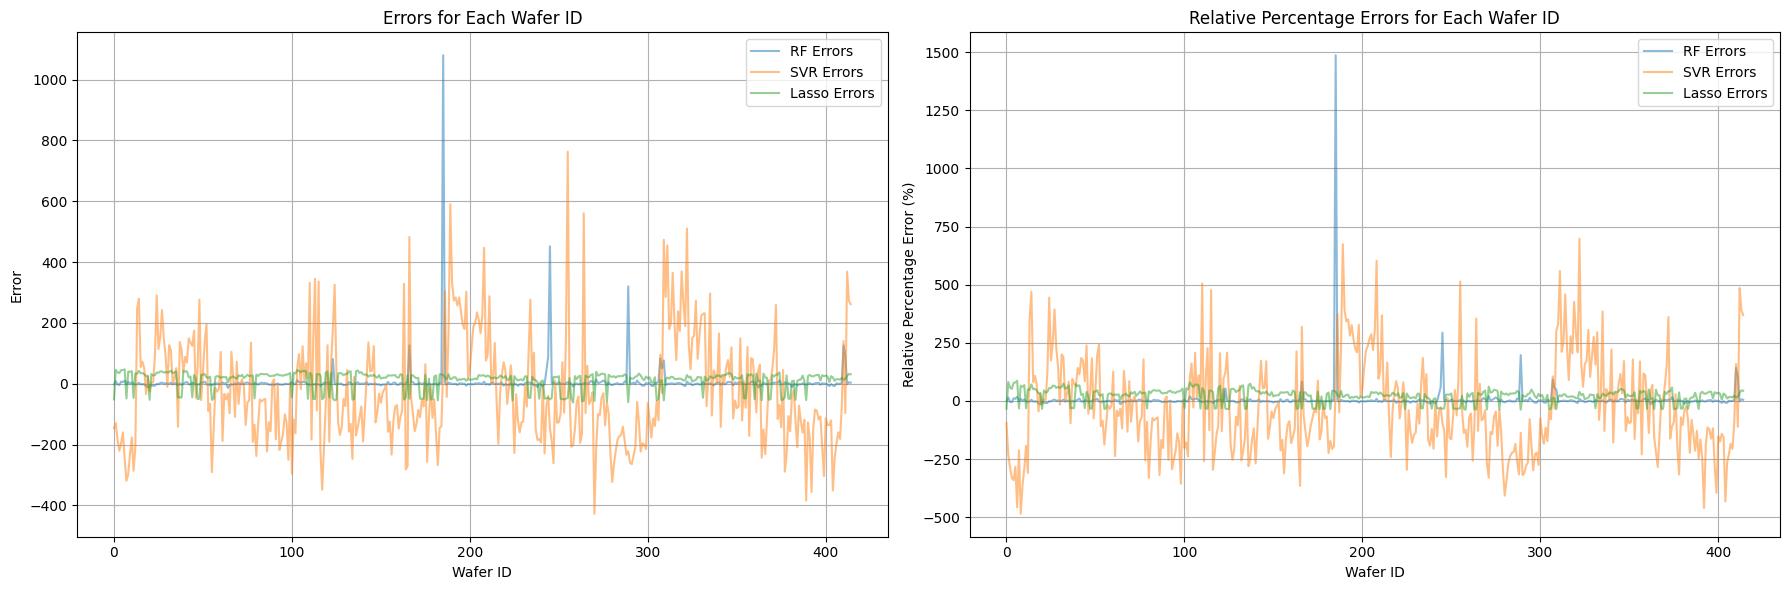

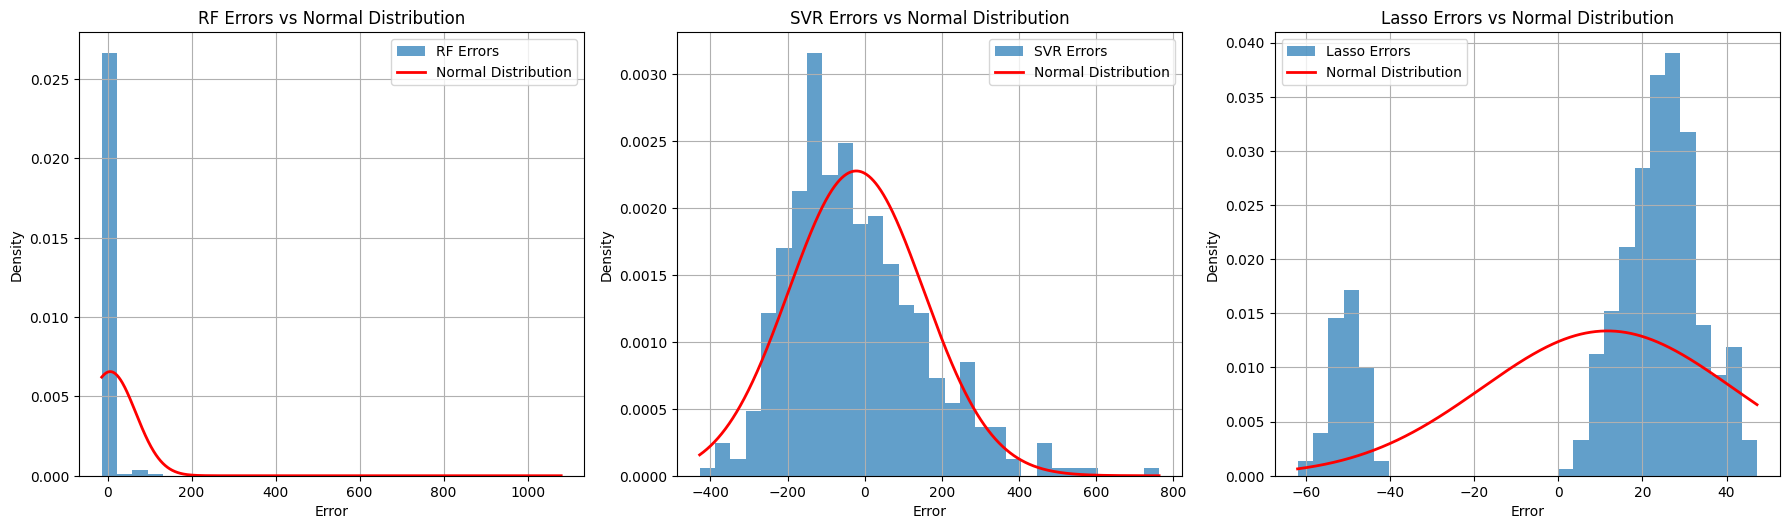

{'RF Errors': KstestResult(statistic=0.4746987951807229, pvalue=1.150688337727401e-42, statistic_location=6.799543499999999, statistic_sign=1),
 'SVR Errors': KstestResult(statistic=0.06987951807228916, pvalue=0.2632061490707068, statistic_location=-17.70853798598273, statistic_sign=1),
 'Lasso Errors': KstestResult(statistic=0.2746987951807229, pvalue=3.478622997272085e-14, statistic_location=12.405203525521086, statistic_sign=-1)}

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, norm

# Adjusted to use absolute_errors dictionary
absolute_errors = {
    'RF Errors': absolute_errors['Random Forest'],
    'SVR Errors': absolute_errors['SVR'],
    'Lasso Errors': absolute_errors['Lasso']
}

# Initialize figure for error plots
plt.figure(figsize=(18, 6))

# Plot errors for each model
for label, errors in absolute_errors.items():
    plt.subplot(1, 2, 1)
    plt.plot(errors, alpha=0.5, label=label)
plt.title('Errors for Each Wafer ID')
plt.xlabel('Wafer ID')
plt.ylabel('Error')
plt.legend()
plt.grid()

# Plot relative percentage errors for each model
plt.subplot(1, 2, 2)
for label, errors in absolute_errors.items():
    relative_errors = errors / np.maximum(np.abs(test_outputs_inv), 1e-8) * 100
    plt.plot(relative_errors, alpha=0.5, label=label)
plt.title('Relative Percentage Errors for Each Wafer ID')
plt.xlabel('Wafer ID')
plt.ylabel('Relative Percentage Error (%)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Calculate mean, std, and normal distribution for each model's errors
plt.figure(figsize=(18, 15))
for i, (label, errors) in enumerate(absolute_errors.items(), start=1):
    mean_error, std_error = np.mean(errors), np.std(errors)
    # Calculate min and max for the current model's errors to define x_values
    x_min = np.min(errors)
    x_max = np.max(errors)
    x_values = np.linspace(x_min, x_max, 1000)
    
    normal_distribution = norm.pdf(x_values, mean_error, std_error)
    
    # Plot histograms with normal distribution curve
    plt.subplot(3, 3, i)
    plt.hist(errors, bins=30, alpha=0.7, density=True, label=f'{label}')
    plt.plot(x_values, normal_distribution, 'r-', label='Normal Distribution', linewidth=2)
    plt.title(f'{label} vs Normal Distribution')
    plt.xlabel('Error')
    plt.ylabel('Density')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

# Perform KS-test
ks_tests = {}
for label, errors in absolute_errors.items():
    mean_error, std_error = np.mean(errors), np.std(errors)
    ks_tests[label] = ks_2samp(errors, np.random.normal(mean_error, std_error, size=len(errors)))

# Display KS-test results
ks_tests


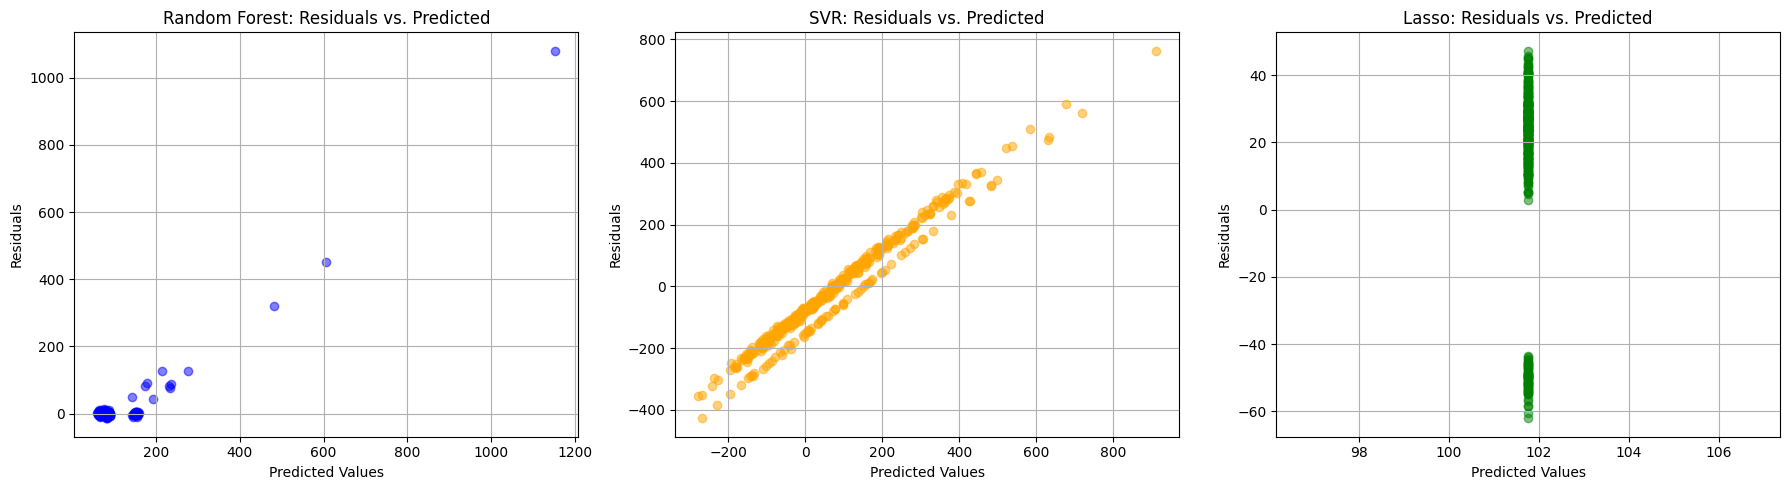

RF Errors White Test: (415.0, 0.47691782172510144, nan, nan)
SVR Errors White Test: (415.0, 0.47691782172510144, nan, nan)
Lasso Errors White Test: (415.0, 0.47691782172510144, nan, nan)


In [36]:
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
import matplotlib.pyplot as plt

absolute_errors_corrected = {
    'Random Forest': absolute_errors['RF Errors'],
    'SVR': absolute_errors['SVR Errors'],
    'Lasso': absolute_errors['Lasso Errors']
}

# Assuming predictions_inv and absolute_errors dictionaries are correctly populated as before
predictions_inv = {
    'Random Forest': predictions_inv['Random Forest'],
    'SVR': predictions_inv['SVR'],
    'Lasso': predictions_inv['Lasso']
}

# Adjust model_colors to match your actual model names in absolute_errors
model_colors = {
    'Random Forest': 'blue',
    'SVR': 'orange',
    'Lasso': 'green'
}

# Ensure the keys are consistent across dictionaries
plt.figure(figsize=(18, 5))

# Plotting residuals vs. predicted values for each model
for model_name in absolute_errors_corrected.keys():
    plt.subplot(1, 3, list(absolute_errors_corrected.keys()).index(model_name) + 1)
    plt.scatter(predictions_inv[model_name], absolute_errors_corrected[model_name], alpha=0.5, color=model_colors[model_name])
    plt.title(f'{model_name}: Residuals vs. Predicted')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid()
    # else:
    #     print(f"Skipping {model_name} due to missing data")

plt.tight_layout()
plt.show()

# Prepare X for the White test with a constant
X = sm.add_constant(scaled_test_inputs)  # X represents the predictor variables with a constant added

# Conducting the White test for Heteroscedasticity
white_test_results = {}
for model_name, errors in absolute_errors.items():
    white_test_results[model_name] = het_white(errors, X)

# Display the White test results
for model_name, result in white_test_results.items():
    print(f'{model_name} White Test:', result)

In [ ]:
# !pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 435.7 kB/s eta 0:00:23
   ---------------------------------------- 0.0/9.9 MB 326.8 kB/s eta 0:00:31
   ---------------------------------------- 0.1/9.9 MB 438.9 kB/s eta 0:00:23
   ---------------------------------------- 0.1/9.9 MB 595.3 kB/s eta 0:00:17
    --------------------------------------- 0.2/9.9 MB 654.6 kB/s eta 0:00:15
    --------------------------------------- 0.2/9.9 MB 734.2 kB/s eta 0:00:14
    --------------------------------------- 0.2/9.9 MB 734.2 kB/s eta 0:00:14
    --------------------------------------- 0.2/9.9 MB 734.2 kB/s eta 0:00:14
   - -------------------------------------- 0.3/9.9 MB 582.4 kB/s eta 0:00:17
   - -------------------------------------- 0.4/9.9 MB 768.6 kB/s eta 0:00:13
   - -------------------------------------- 0.5/9.9 MB 880.6 kB/s eta 0:00:11
   -

- Rank the features

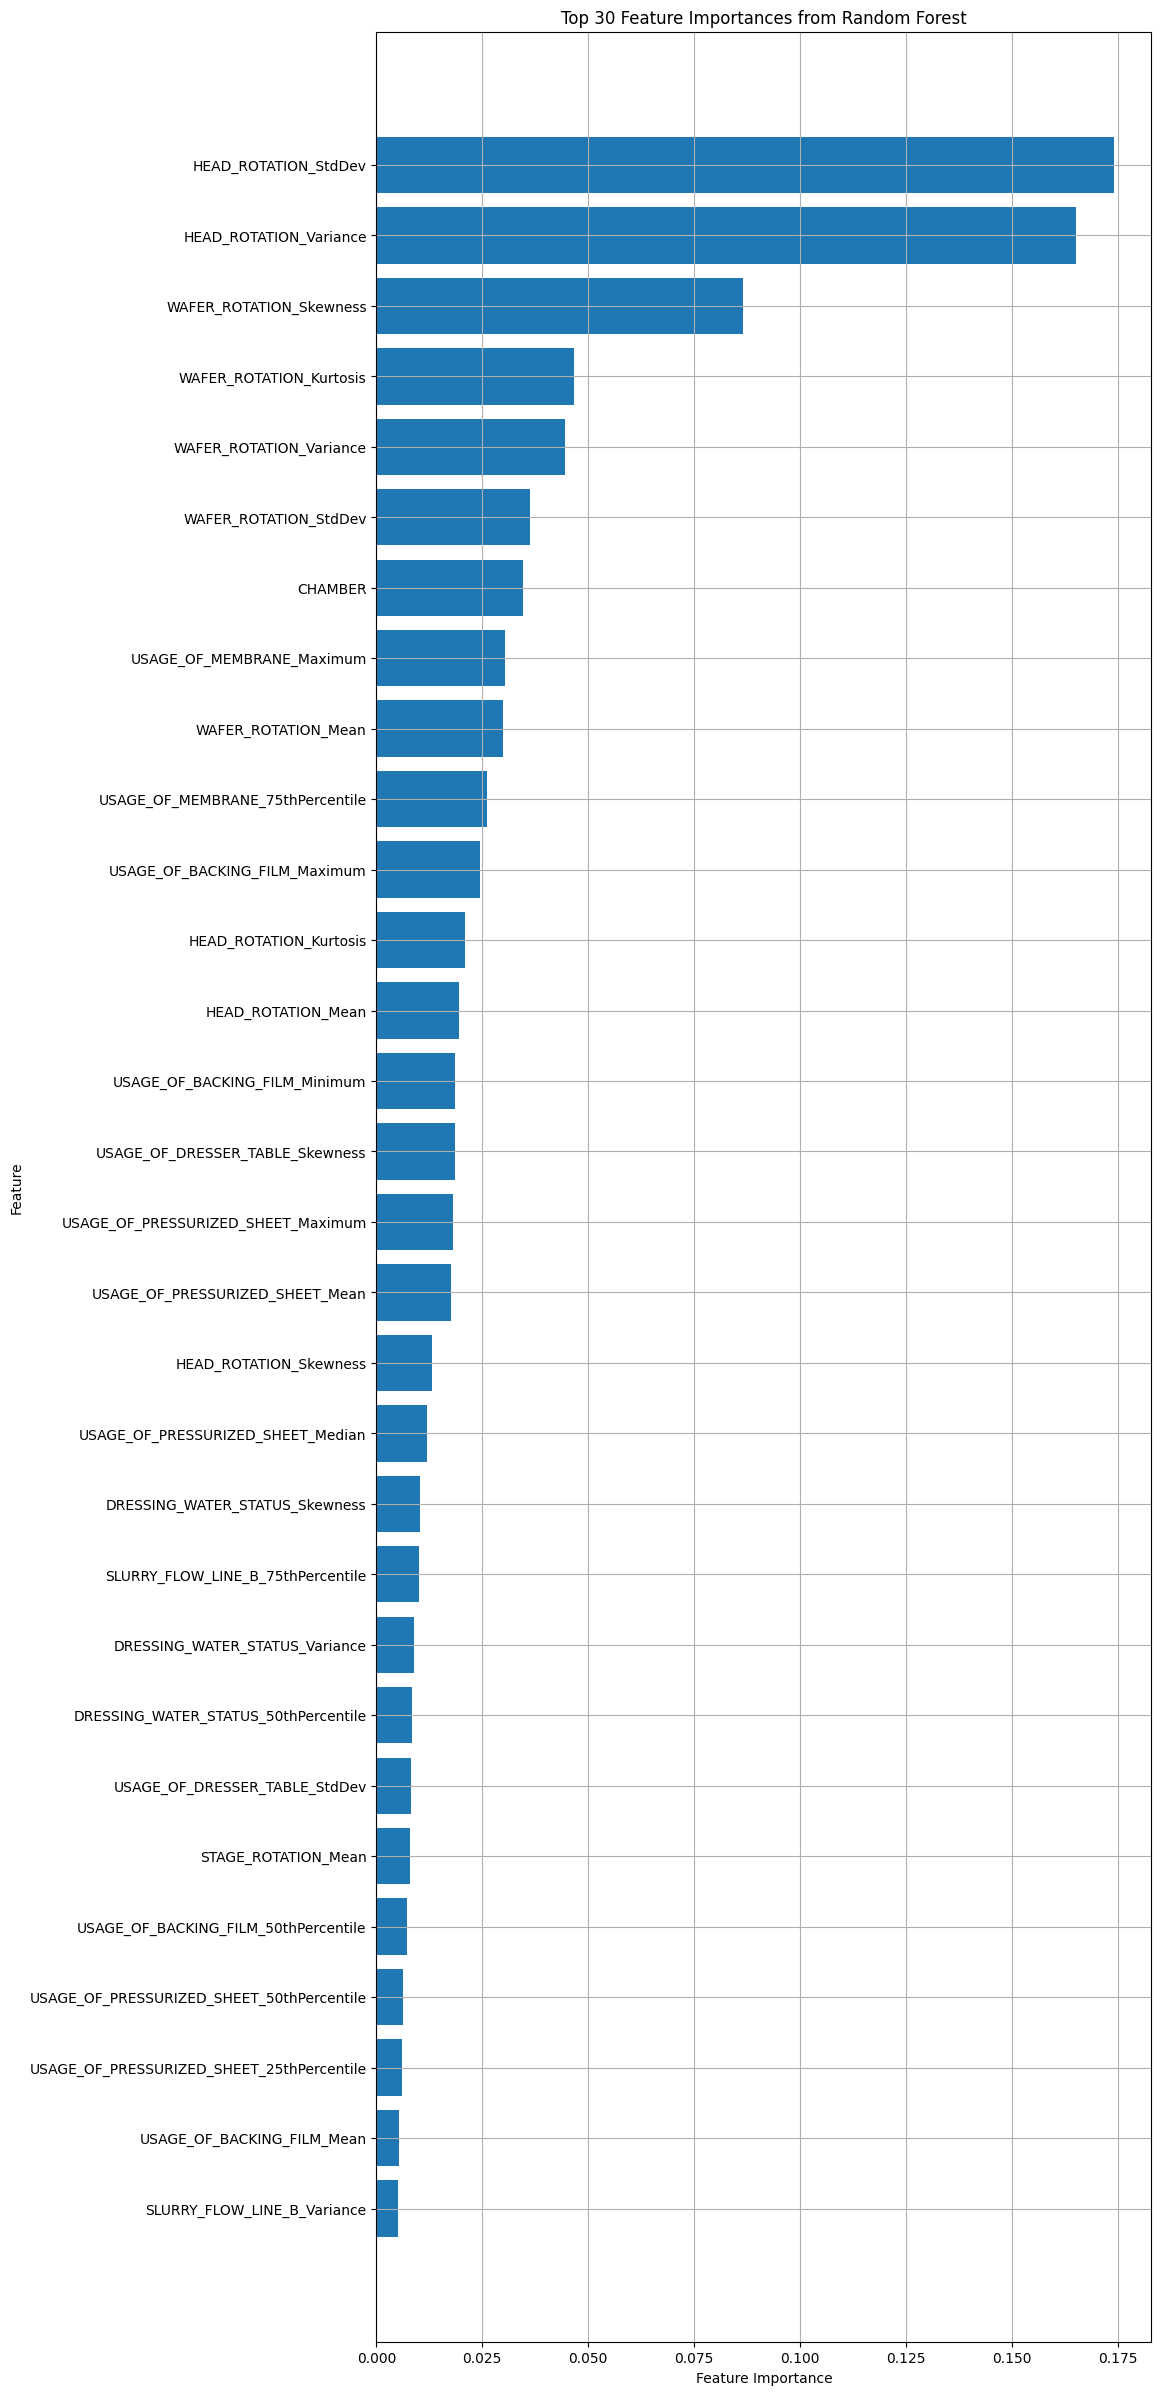

In [39]:
# Extract feature importances from the Random Forest model and pair them with column names
feature_importances_rf = models['Random Forest'].feature_importances_
feature_names = training_set.drop(columns=['WAFER_ID', 'AVG_REMOVAL_RATE']).columns

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_rf})

# Sort the DataFrame based on feature importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
# plt.figure(figsize=(10, 8))
# plt.barh(feature_importances_df['Feature'][:30], feature_importances_df['Importance'][:30])
plt.figure(figsize=(10, 30))
plt.barh(feature_importances_df['Feature'][:30], feature_importances_df['Importance'][:30])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 30 Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.grid()
plt.show()

- The new models

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# Assuming 'feature_importances_df' is already defined and contains the feature importances

# Select the top 20 features based on their importance
top_20_features = feature_importances_df['Feature'][:20].values

# Initialize a MinMaxScaler for inputs
inputs_scaler = MinMaxScaler()

# Scale the training and test sets for the top 20 features only
scaled_training_inputs_top20 = inputs_scaler.fit_transform(training_set[top_20_features])
scaled_test_inputs_top20 = inputs_scaler.transform(test_set[top_20_features])

# Define and fit models on the training data with only the top 20 features
models_top20 = {
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Lasso': Lasso()
}

# Store predictions and errors in dictionaries for easy access and manipulation
predictions_top20 = {}
errors_top20 = {}
metrics_top20 = {}

for name, model in models_top20.items():
    # Fit the model
    model.fit(scaled_training_inputs_top20, scaled_training_outputs)
    
    # Predict on the test data
    predictions_top20[name] = model.predict(scaled_test_inputs_top20)
    
    # Inverse transform the predictions to original scale
    predictions_inv = outputs_scaler.inverse_transform(predictions_top20[name].reshape(-1, 1)).flatten()
    
    # Calculate errors
    errors_top20[name] = predictions_inv - test_outputs_inv
    
    # Calculate and store various metrics
    metrics_top20[name] = {
        'Mean of Error': np.mean(errors_top20[name]),
        'Std of Error': np.std(errors_top20[name]),
        'Max of Error': np.max(errors_top20[name]),
        'MAE': mean_absolute_error(test_outputs_inv, predictions_inv),
        'Mean Absolute Percentage Error': mean_absolute_percentage_error(test_outputs_inv, predictions_inv),
        'Max Absolute Percentage Error': np.max(np.abs(errors_top20[name] / np.maximum(test_outputs_inv, 1e-8))),
        'MSE': mean_squared_error(test_outputs_inv, predictions_inv),
        'SSE': np.sum(np.square(errors_top20[name])),
        'R': np.corrcoef(test_outputs_inv, predictions_inv)[0, 1],
        'R2 Score': r2_score(test_outputs_inv, predictions_inv)
    }

# Convert the metrics dictionary to a pandas DataFrame for display
results_top20_df = pd.DataFrame(metrics_top20).T

results_top20_df


,Mean of Error,Std of Error,Max of Error,MAE,Mean Absolute Percentage Error,Max Absolute Percentage Error,MSE,SSE,R,R2 Score
Random Forest,5.588612,62.691421,1036.913497,11.365289,0.127190,14.270791,3961.446882,1.644000e+06,4.692067e-01,-3.450701
SVR,393.619350,18.997110,463.627927,393.619350,4.760547,7.861147,155297.082550,6.444829e+07,7.847023e-01,-173.476874
Lasso,11.658610,29.834084,47.257613,29.410391,0.340398,0.867072,1025.995780,4.257882e+05,-1.721673e-17,-0.152710


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, norm
import pandas as pd

# Assuming errors_top20 and predictions_top20 are dictionaries containing model errors and predictions
errors_top20 = {
    'Random Forest': errors_rf_top20,
    'SVR': errors_svr_top20,
    'Lasso': errors_lasso_top20
}

# Relative errors calculation could be streamlined as follows:
relative_errors_top20 = {model: errors / np.maximum(np.abs(test_outputs_inv), 1e-8)
                         for model, errors in errors_top20.items()}

# Plotting errors and relative percentage errors
plt.figure(figsize=(18, 6))
for i, (model, errors) in enumerate(errors_top20.items(), start=1):
    plt.subplot(1, 2, 1)
    plt.plot(errors, alpha=0.5, label=f'{model} Errors', color=model_colors[model])
    plt.title('Errors for Each Wafer ID (Top 20 Features)')
    plt.xlabel('Wafer ID')
    plt.ylabel('Error')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(relative_errors_top20[model] * 100, alpha=0.5, label=f'{model} Relative Errors', color=model_colors[model])
    plt.title('Relative Percentage Errors for Each Wafer ID (Top 20 Features)')
    plt.xlabel('Wafer ID')
    plt.ylabel('Relative Percentage Error')
    plt.legend()

plt.tight_layout()
plt.show()

# Plotting histograms of errors with normal distribution fit for each model
plt.figure(figsize=(18, 15))
for i, (model, errors) in enumerate(errors_top20.items(), start=1):
    mean_error, std_error = np.mean(errors), np.std(errors)
    x_values = np.linspace(min(errors), max(errors), 1000)
    normal_distribution = norm.pdf(x_values, mean_error, std_error)

    plt.subplot(3, 3, i)
    plt.hist(errors, bins=30, alpha=0.7, density=True, label=f'{model} Errors', color=model_colors[model])
    plt.plot(x_values, normal_distribution, label='Normal Distribution', linewidth=2, color='red')
    plt.title(f'{model} Errors vs Normal Distribution (Top 20)')
    plt.xlabel('Error')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

# Conducting and displaying KS-test results
ks_tests_top20 = {model: ks_2samp(errors, np.random.normal(np.mean(errors), np.std(errors), size=len(errors)))
                  for model, errors in errors_top20.items()}

# Display KS-test results
for model, test_result in ks_tests_top20.items():
    print(f'{model} KS-test vs Normal:', test_result)


NameError: name 'errors_rf_top20' is not defined

- Error Analysis

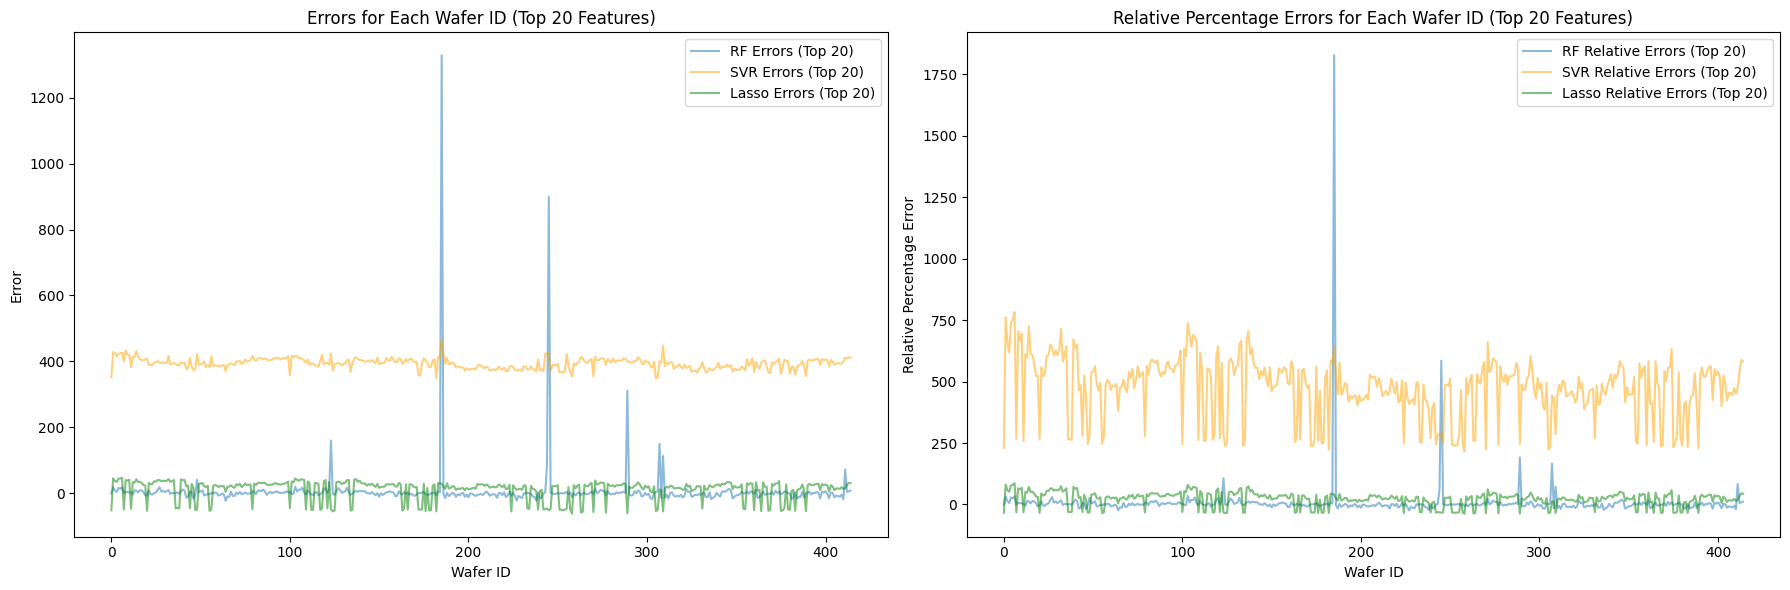

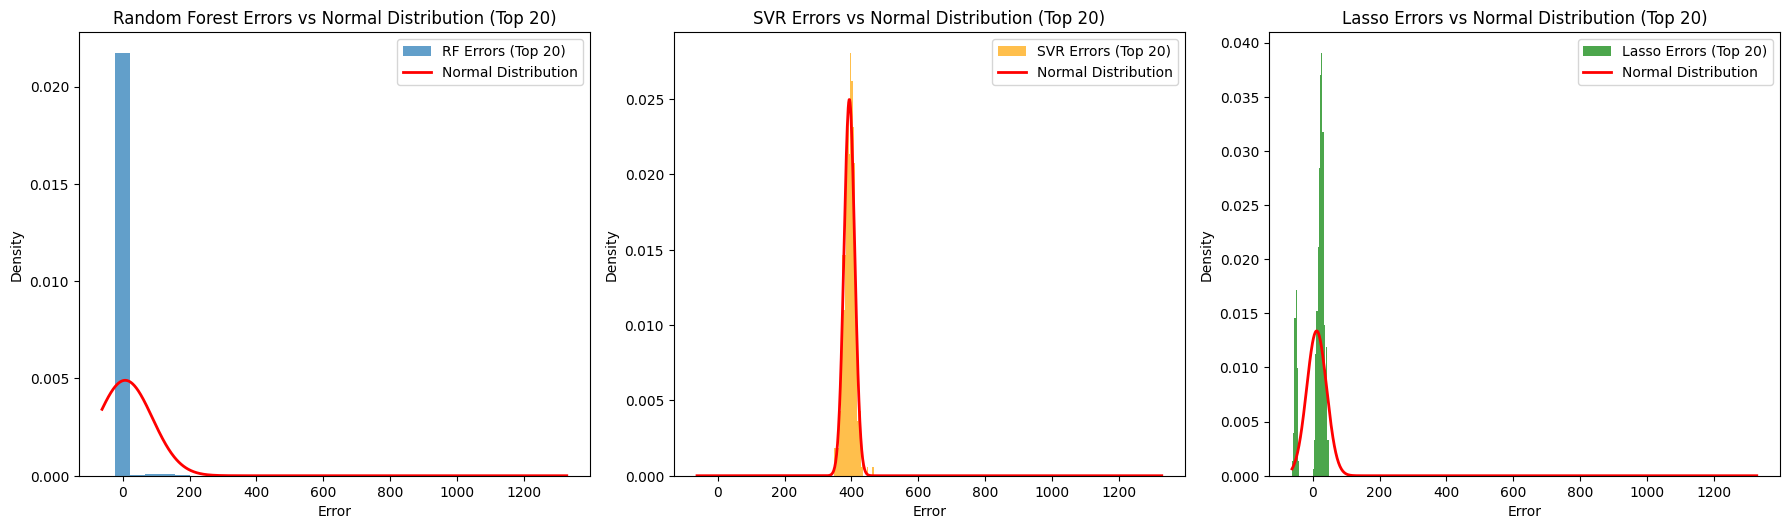

(KstestResult(statistic=0.42650602409638555, pvalue=3.053121516826967e-34, statistic_location=13.917025500000001, statistic_sign=1),
 KstestResult(statistic=0.060240963855421686, pvalue=0.43917975032680057, statistic_location=394.68234293566604, statistic_sign=-1),
 KstestResult(statistic=0.3228915662650602, pvalue=1.5600759214448026e-19, statistic_location=9.960020078281001, statistic_sign=-1))

In [ ]:
# # Calculate relative errors for each model (top 20 features)
# relative_errors_rf_top20 = errors_rf_top20 / np.maximum(np.abs(test_outputs_inv), 1e-8)
# relative_errors_svr_top20 = errors_svr_top20 / np.maximum(np.abs(test_outputs_inv), 1e-8)
# relative_errors_lasso_top20 = errors_lasso_top20 / np.maximum(np.abs(test_outputs_inv), 1e-8)

# # Plot the errors of each model for each Wafer ID
# plt.figure(figsize=(18, 6))

# plt.subplot(1, 2, 1)
# plt.plot(errors_rf_top20, alpha=0.5, label='RF Errors (Top 20)')
# plt.plot(errors_svr_top20, alpha=0.5, label='SVR Errors (Top 20)', color='orange')
# plt.plot(errors_lasso_top20, alpha=0.5, label='Lasso Errors (Top 20)', color='green')
# plt.title('Errors for Each Wafer ID (Top 20 Features)')
# plt.xlabel('Wafer ID')
# plt.ylabel('Error')
# plt.legend()

# # Plot the relative percentage errors for each model for each Wafer ID
# plt.subplot(1, 2, 2)
# plt.plot(relative_errors_rf_top20 * 100, alpha=0.5, label='RF Relative Errors (Top 20)')
# plt.plot(relative_errors_svr_top20 * 100, alpha=0.5, label='SVR Relative Errors (Top 20)', color='orange')
# plt.plot(relative_errors_lasso_top20 * 100, alpha=0.5, label='Lasso Relative Errors (Top 20)', color='green')
# plt.title('Relative Percentage Errors for Each Wafer ID (Top 20 Features)')
# plt.xlabel('Wafer ID')
# plt.ylabel('Relative Percentage Error')
# plt.legend()

# plt.tight_layout()
# plt.show()

# # Calculate the mean and std of errors for each model (top 20 features)
# mean_error_rf_top20, std_error_rf_top20 = np.mean(errors_rf_top20), np.std(errors_rf_top20)
# mean_error_svr_top20, std_error_svr_top20 = np.mean(errors_svr_top20), np.std(errors_svr_top20)
# mean_error_lasso_top20, std_error_lasso_top20 = np.mean(errors_lasso_top20), np.std(errors_lasso_top20)

# # Generate a range of values for the normal distribution
# x_values = np.linspace(min(np.min(errors_rf_top20), np.min(errors_svr_top20), np.min(errors_lasso_top20)),
#                        max(np.max(errors_rf_top20), np.max(errors_svr_top20), np.max(errors_lasso_top20)), 1000)
# # Normal distribution for each model
# normal_distribution_rf_top20 = norm.pdf(x_values, mean_error_rf_top20, std_error_rf_top20)
# normal_distribution_svr_top20 = norm.pdf(x_values, mean_error_svr_top20, std_error_svr_top20)
# normal_distribution_lasso_top20 = norm.pdf(x_values, mean_error_lasso_top20, std_error_lasso_top20)

# # Plot histograms of relative errors with normal distribution curve
# plt.figure(figsize=(18, 15))

# # Random Forest (Top 20)
# plt.subplot(3, 3, 1)
# plt.hist(errors_rf_top20, bins=30, alpha=0.7, density=True, label='RF Errors (Top 20)')
# plt.plot(x_values, normal_distribution_rf_top20, label='Normal Distribution', linewidth=2, color='red')
# plt.title('Random Forest Errors vs Normal Distribution (Top 20)')
# plt.xlabel('Error')
# plt.ylabel('Density')
# plt.legend()

# # SVR (Top 20)
# plt.subplot(3, 3, 2)
# plt.hist(errors_svr_top20, bins=30, alpha=0.7, density=True, label='SVR Errors (Top 20)', color='orange')
# plt.plot(x_values, normal_distribution_svr_top20, label='Normal Distribution', linewidth=2, color='red')
# plt.title('SVR Errors vs Normal Distribution (Top 20)')
# plt.xlabel('Error')
# plt.ylabel('Density')
# plt.legend()

# # Lasso (Top 20)
# plt.subplot(3, 3, 3)
# plt.hist(errors_lasso_top20, bins=30, alpha=0.7, density=True, label='Lasso Errors (Top 20)', color='green')
# plt.plot(x_values, normal_distribution_lasso_top20, label='Normal Distribution', linewidth=2, color='red')
# plt.title('Lasso Errors vs Normal Distribution (Top 20)')
# plt.xlabel('Error')
# plt.ylabel('Density')
# plt.legend()

# plt.tight_layout()
# plt.show()

# # Generate normal distributions based on the mean and std of errors for each model (top 20 features)
# normal_errors_rf_top20 = np.random.normal(mean_error_rf_top20, std_error_rf_top20, size=len(errors_rf_top20))
# normal_errors_svr_top20 = np.random.normal(mean_error_svr_top20, std_error_svr_top20, size=len(errors_svr_top20))
# normal_errors_lasso_top20 = np.random.normal(mean_error_lasso_top20, std_error_lasso_top20, size=len(errors_lasso_top20))

# # Perform KS-test between the error distributions and a normal distribution
# ks_test_rf_top20_vs_normal = ks_2samp(errors_rf_top20, normal_errors_rf_top20)
# ks_test_svr_top20_vs_normal = ks_2samp(errors_svr_top20, normal_errors_svr_top20)
# ks_test_lasso_top20_vs_normal = ks_2samp(errors_lasso_top20, normal_errors_lasso_top20)

# ks_test_rf_top20_vs_normal, ks_test_svr_top20_vs_normal, ks_test_lasso_top20_vs_normal


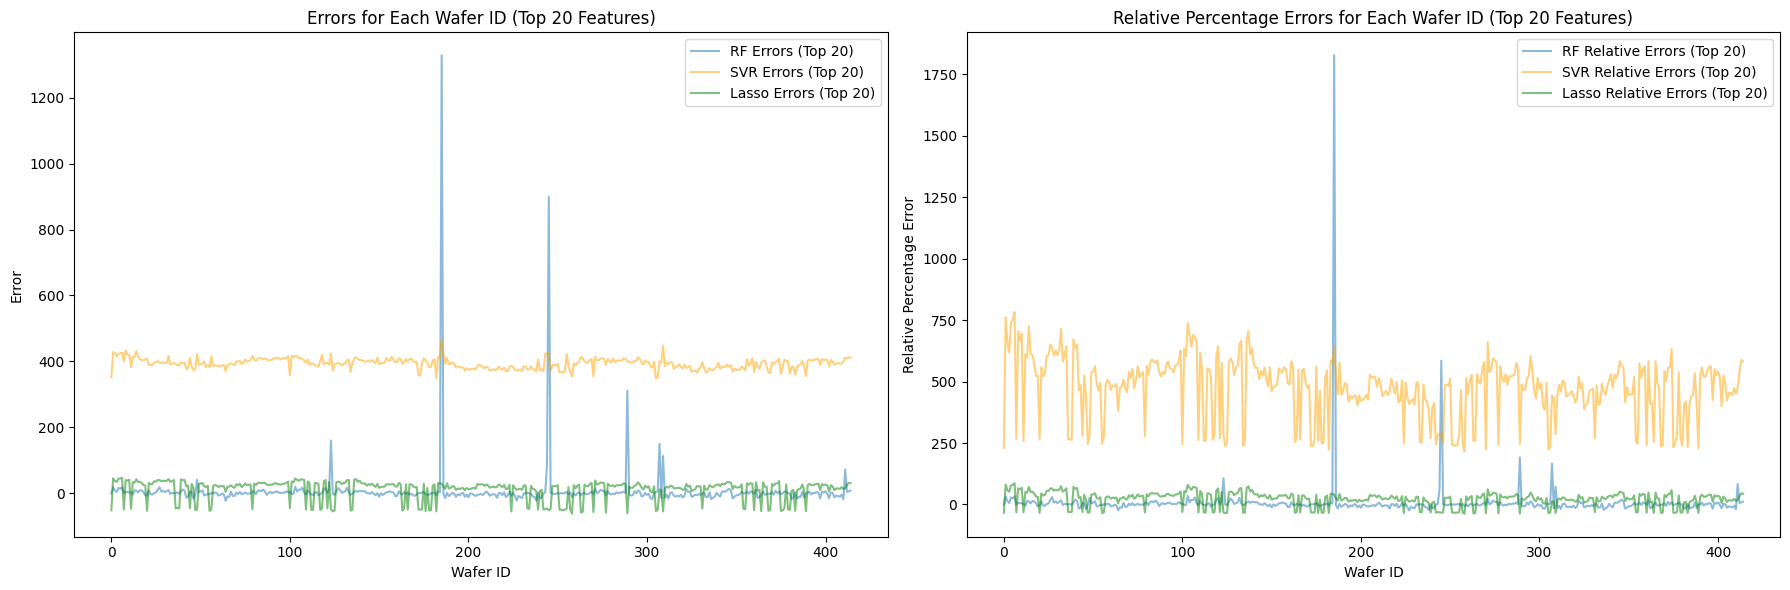

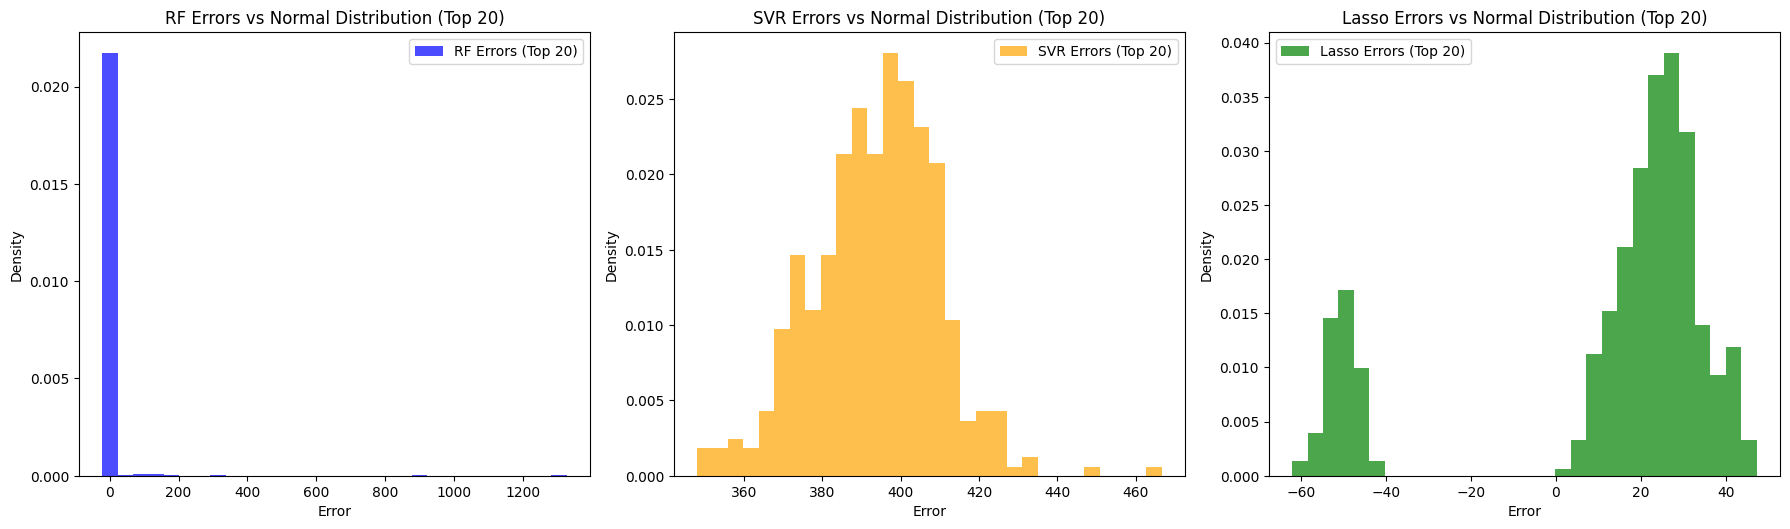

(KstestResult(statistic=0.41686746987951806, pvalue=1.1096321536861076e-32, statistic_location=-17.64725380917805, statistic_sign=-1),
 KstestResult(statistic=0.06506024096385542, pvalue=0.3438000658007248, statistic_location=410.8036738335721, statistic_sign=1),
 KstestResult(statistic=0.2674698795180723, pvalue=1.84070595983931e-13, statistic_location=9.007462203559124, statistic_sign=-1))

In [ ]:
def plot_errors(errors_rf, errors_svr, errors_lasso, title):
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(errors_rf, alpha=0.5, label='RF Errors (Top 20)')
    plt.plot(errors_svr, alpha=0.5, label='SVR Errors (Top 20)', color='orange')
    plt.plot(errors_lasso, alpha=0.5, label='Lasso Errors (Top 20)', color='green')
    plt.title(f'Errors for Each Wafer ID ({title})')
    plt.xlabel('Wafer ID')
    plt.ylabel('Error')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(errors_rf / np.maximum(np.abs(test_outputs_inv), 1e-8) * 100, alpha=0.5, label='RF Relative Errors (Top 20)')
    plt.plot(errors_svr / np.maximum(np.abs(test_outputs_inv), 1e-8) * 100, alpha=0.5, label='SVR Relative Errors (Top 20)', color='orange')
    plt.plot(errors_lasso / np.maximum(np.abs(test_outputs_inv), 1e-8) * 100, alpha=0.5, label='Lasso Relative Errors (Top 20)', color='green')
    plt.title(f'Relative Percentage Errors for Each Wafer ID ({title})')
    plt.xlabel('Wafer ID')
    plt.ylabel('Relative Percentage Error')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_error_histograms(errors_rf, errors_svr, errors_lasso, title):
    plt.figure(figsize=(18, 15))

    for i, errors, color, model_name in zip(range(1, 4), [errors_rf, errors_svr, errors_lasso], ['blue', 'orange', 'green'], ['RF', 'SVR', 'Lasso']):
        plt.subplot(3, 3, i)
        plt.hist(errors, bins=30, alpha=0.7, density=True, label=f'{model_name} Errors (Top 20)', color=color)
        plt.title(f'{model_name} Errors vs Normal Distribution (Top 20)')
        plt.xlabel('Error')
        plt.ylabel('Density')
        plt.legend()

    plt.tight_layout()
    plt.show()

def perform_ks_test(errors_rf, errors_svr, errors_lasso, title):
    normal_errors_rf = np.random.normal(np.mean(errors_rf), np.std(errors_rf), size=len(errors_rf))
    normal_errors_svr = np.random.normal(np.mean(errors_svr), np.std(errors_svr), size=len(errors_svr))
    normal_errors_lasso = np.random.normal(np.mean(errors_lasso), np.std(errors_lasso), size=len(errors_lasso))

    ks_test_rf_vs_normal = ks_2samp(errors_rf, normal_errors_rf)
    ks_test_svr_vs_normal = ks_2samp(errors_svr, normal_errors_svr)
    ks_test_lasso_vs_normal = ks_2samp(errors_lasso, normal_errors_lasso)

    return ks_test_rf_vs_normal, ks_test_svr_vs_normal, ks_test_lasso_vs_normal

# Plot errors and relative errors
plot_errors(errors_rf_top20, errors_svr_top20, errors_lasso_top20, 'Top 20 Features')

# Plot histograms of errors with normal distribution curve
plot_error_histograms(errors_rf_top20, errors_svr_top20, errors_lasso_top20, 'Top 20 Features')

# Perform KS-test between the error distributions and a normal distribution
ks_test_rf_top20_vs_normal, ks_test_svr_top20_vs_normal, ks_test_lasso_top20_vs_normal = perform_ks_test(errors_rf_top20, errors_svr_top20, errors_lasso_top20, 'Top 20 Features')

ks_test_rf_top20_vs_normal, ks_test_svr_top20_vs_normal, ks_test_lasso_top20_vs_normal


ReliefF

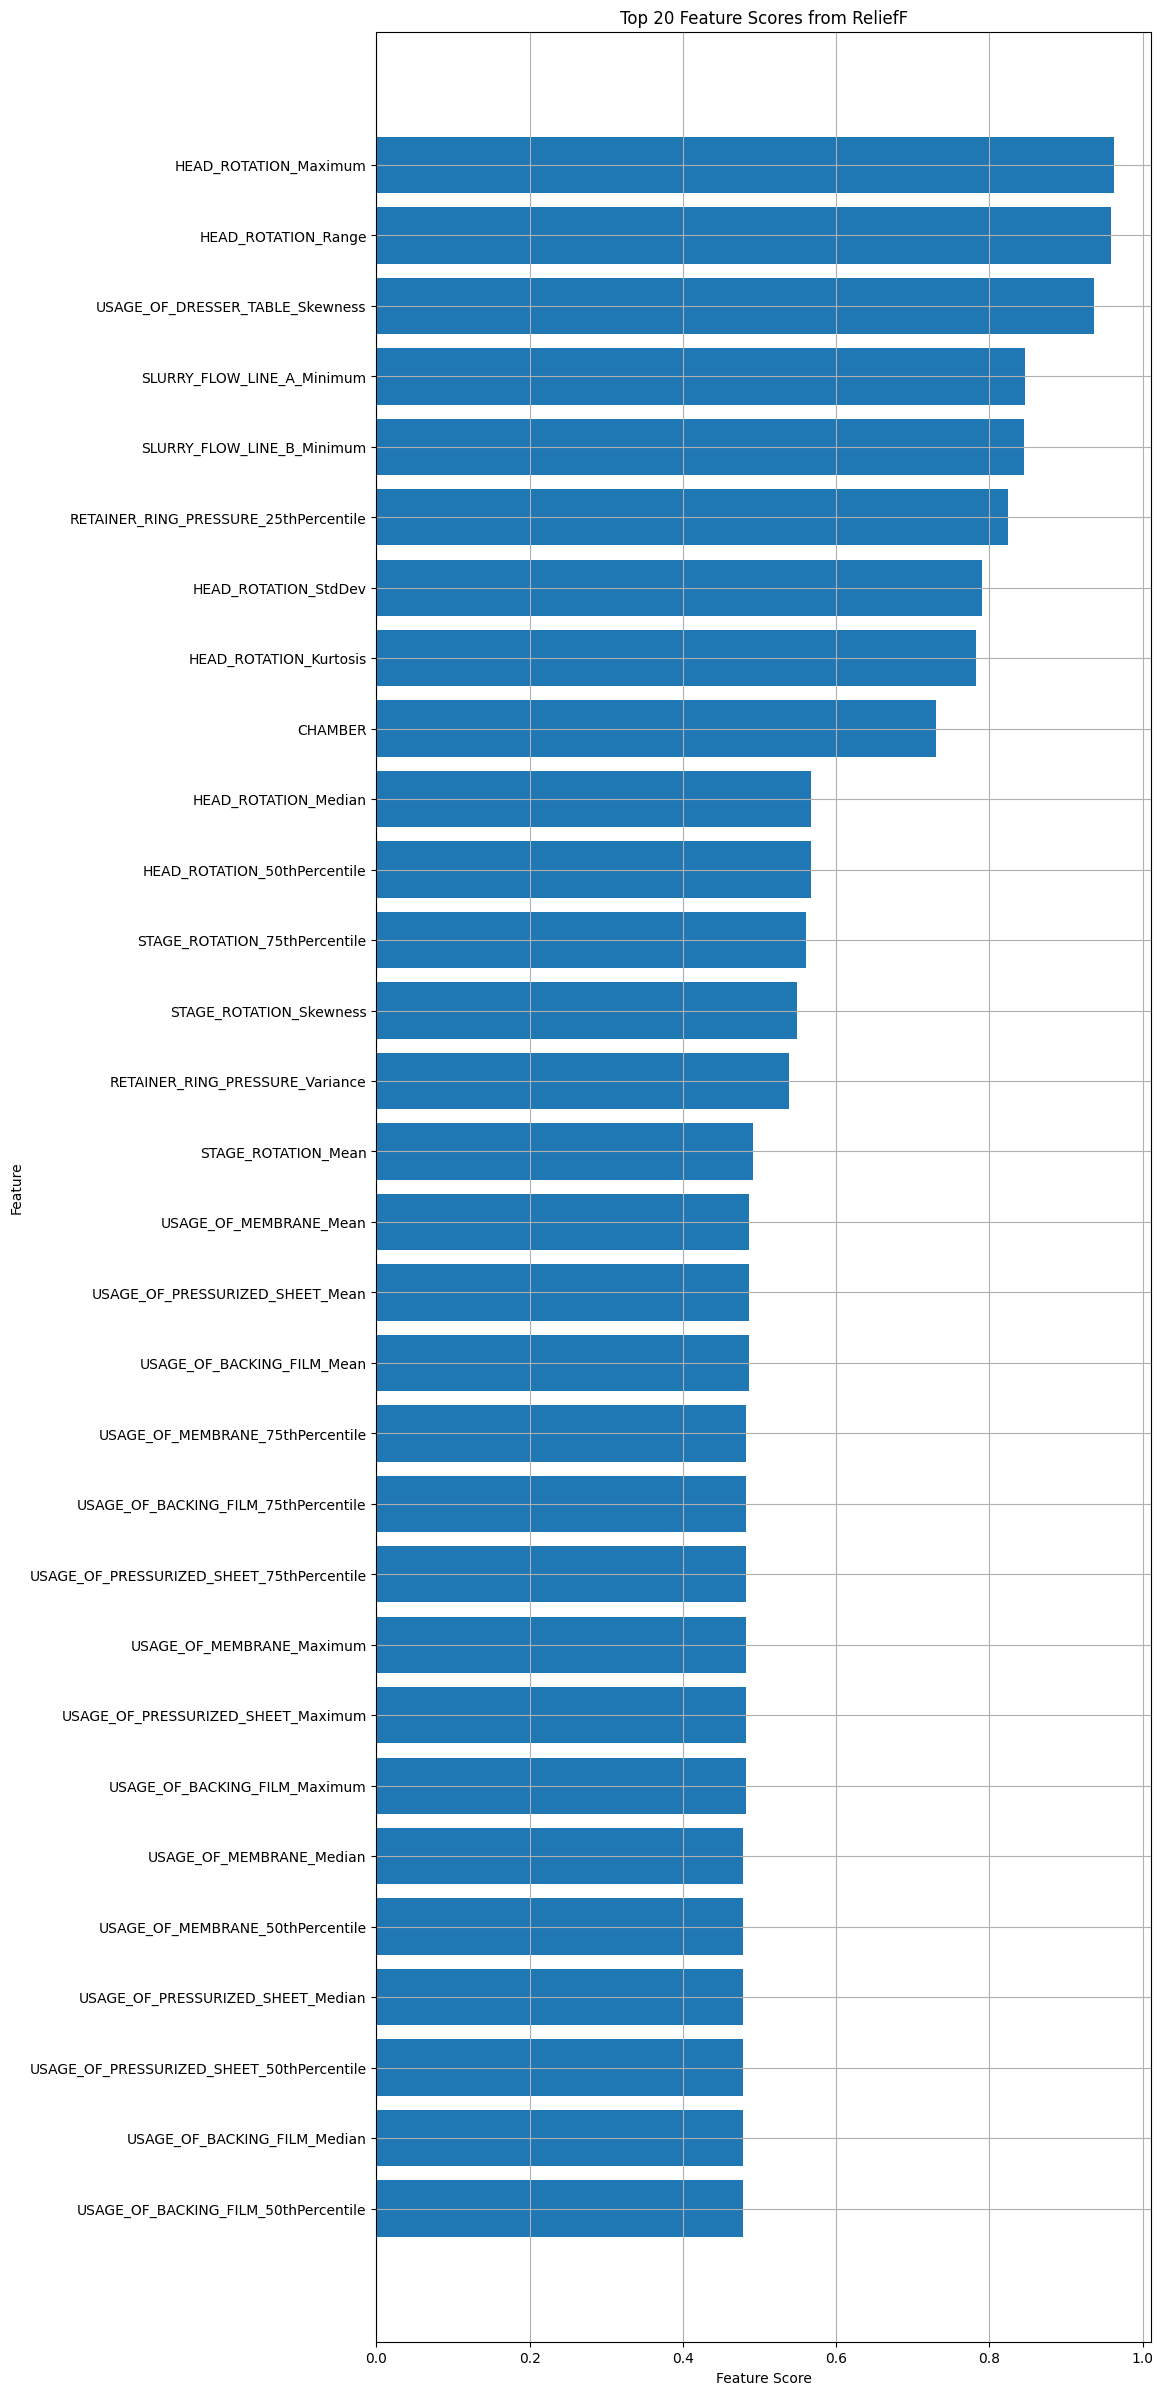

In [ ]:
from skrebate import ReliefF
from sklearn.model_selection import train_test_split

X = training_set.drop(columns=['WAFER_ID', 'AVG_REMOVAL_RATE']).values
y = training_set['AVG_REMOVAL_RATE'].values

# It's a good practice to use a train/test split to avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y)

fs = ReliefF(n_neighbors=30)
fs.fit(X_train, y_train)

feature_scores_dict = {feature_name: feature_score for feature_name, feature_score in zip(training_set.drop(columns=['WAFER_ID', 'AVG_REMOVAL_RATE']).columns, fs.feature_importances_)}

# Sort the dictionary by values (feature scores) in descending order
sorted_features = sorted(feature_scores_dict.items(), key=lambda item: item[1], reverse=True)

# Extract the sorted feature names and scores
sorted_feature_names = [feature[0] for feature in sorted_features]
sorted_feature_scores = [feature[1] for feature in sorted_features]

# Plot
plt.figure(figsize=(10, 30))
plt.barh(sorted_feature_names[:30], sorted_feature_scores[:30])
plt.xlabel('Feature Score')
plt.ylabel('Feature')
plt.title('Top 20 Feature Scores from ReliefF')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top
plt.grid()
plt.show()

In [ ]:
# from itertools import zip_longest
# print("Features from RF\t\t\t\tFeature from ReliefF")
# print("--------------------------------------------------------------")
# for item1, item2 in zip_longest(feature_importances_df['Feature'].values[:30], sorted_feature_names[:30]):
#     print(f"{item1}\t\t\t\t {item2}")

Features from RF				Feature from ReliefF
--------------------------------------------------------------
HEAD_ROTATION_StdDev				 SLURRY_FLOW_LINE_B_Mean
HEAD_ROTATION_Variance				 CHAMBER
WAFER_ROTATION_Skewness				 RETAINER_RING_PRESSURE_Mean
WAFER_ROTATION_Kurtosis				 SLURRY_FLOW_LINE_B_75thPercentile
CHAMBER				 SLURRY_FLOW_LINE_C_Mean
WAFER_ROTATION_StdDev				 SLURRY_FLOW_LINE_A_Median
USAGE_OF_DRESSER_TABLE_Skewness				 SLURRY_FLOW_LINE_A_50thPercentile
WAFER_ROTATION_Variance				 SLURRY_FLOW_LINE_B_Median
USAGE_OF_MEMBRANE_Maximum				 SLURRY_FLOW_LINE_B_50thPercentile
HEAD_ROTATION_Mean				 WAFER_ROTATION_Variance
USAGE_OF_BACKING_FILM_Maximum				 HEAD_ROTATION_Kurtosis
WAFER_ROTATION_Mean				 SLURRY_FLOW_LINE_A_Range
USAGE_OF_PRESSURIZED_SHEET_Maximum				 RETAINER_RING_PRESSURE_Variance
HEAD_ROTATION_Kurtosis				 RETAINER_RING_PRESSURE_StdDev
HEAD_ROTATION_Median				 SLURRY_FLOW_LINE_A_Maximum
HEAD_ROTATION_Range				 SLURRY_FLOW_LINE_C_StdDev
USAGE_OF_MEMBRANE_Mean				 EDGE_AIR

In [ ]:
from itertools import zip_longest

print("Features from RF\t\t\t\tFeature from ReliefF")
print("--------------------------------------------------------------")

for item1, item2 in zip_longest(feature_importances_df['Feature'][:30], sorted_feature_names[:30], fillvalue=""):
    print(f"{item1.ljust(30)}\t\t\t\t {item2}")


Features from RF				Feature from ReliefF
--------------------------------------------------------------
HEAD_ROTATION_StdDev          				 HEAD_ROTATION_Maximum
HEAD_ROTATION_Variance        				 HEAD_ROTATION_Range
WAFER_ROTATION_Skewness       				 USAGE_OF_DRESSER_TABLE_Skewness
CHAMBER                       				 SLURRY_FLOW_LINE_A_Minimum
WAFER_ROTATION_Kurtosis       				 SLURRY_FLOW_LINE_B_Minimum
WAFER_ROTATION_StdDev         				 RETAINER_RING_PRESSURE_25thPercentile
WAFER_ROTATION_Variance       				 HEAD_ROTATION_StdDev
USAGE_OF_PRESSURIZED_SHEET_Maximum				 HEAD_ROTATION_Kurtosis
USAGE_OF_MEMBRANE_Maximum     				 CHAMBER
HEAD_ROTATION_Mean            				 HEAD_ROTATION_Median
USAGE_OF_BACKING_FILM_Maximum 				 HEAD_ROTATION_50thPercentile
USAGE_OF_MEMBRANE_Mean        				 STAGE_ROTATION_75thPercentile
HEAD_ROTATION_Kurtosis        				 STAGE_ROTATION_Skewness
HEAD_ROTATION_Skewness        				 RETAINER_RING_PRESSURE_Variance
HEAD_ROTATION_50thPercentile  				 STAGE_ROTATIO

In [ ]:
set1 = set(feature_importances_df['Feature'].values[:40])
set2 = set(sorted_feature_names[:20])

commmon = set1.intersection(set2)
print(commmon)

{'USAGE_OF_MEMBRANE_Mean', 'USAGE_OF_DRESSER_TABLE_Skewness', 'HEAD_ROTATION_Median', 'HEAD_ROTATION_50thPercentile', 'STAGE_ROTATION_Skewness', 'USAGE_OF_MEMBRANE_75thPercentile', 'HEAD_ROTATION_Kurtosis', 'USAGE_OF_PRESSURIZED_SHEET_Mean', 'CHAMBER', 'HEAD_ROTATION_Range', 'HEAD_ROTATION_StdDev'}
